# REGRESION LINEAL MULTIPLE PARA SEGURO MEDICO
## DATASET [kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)

# PASO 1 : INSTALAMOS E IMPORTAMOS LIBRERIAS

In [1]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 4.6 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [4]:
sns.set(style='whitegrid',context='notebook')

# PASO 2 : CARGAMOS DATASET

In [9]:
path = kagglehub.dataset_download("mirichoi0218/insurance")
file = '/insurance.csv'

path_file = path + file

print("Path to dataset files:", path_file)


df = pd.read_csv(path_file)
df.head(5)

Path to dataset files: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1/insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# PASO 3 : EDA

In [10]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [11]:
df.isna().sum().sum()

0

## CORRELACIONES

<Axes: >

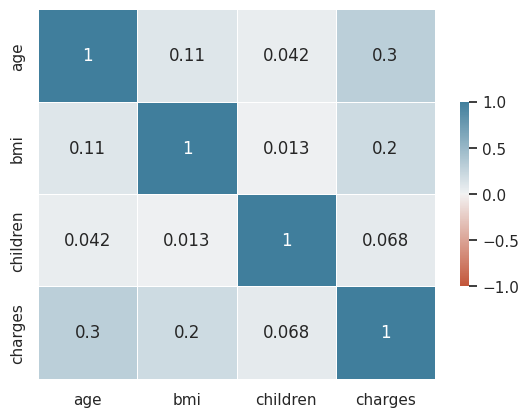

In [12]:
sns.heatmap(
    data=df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

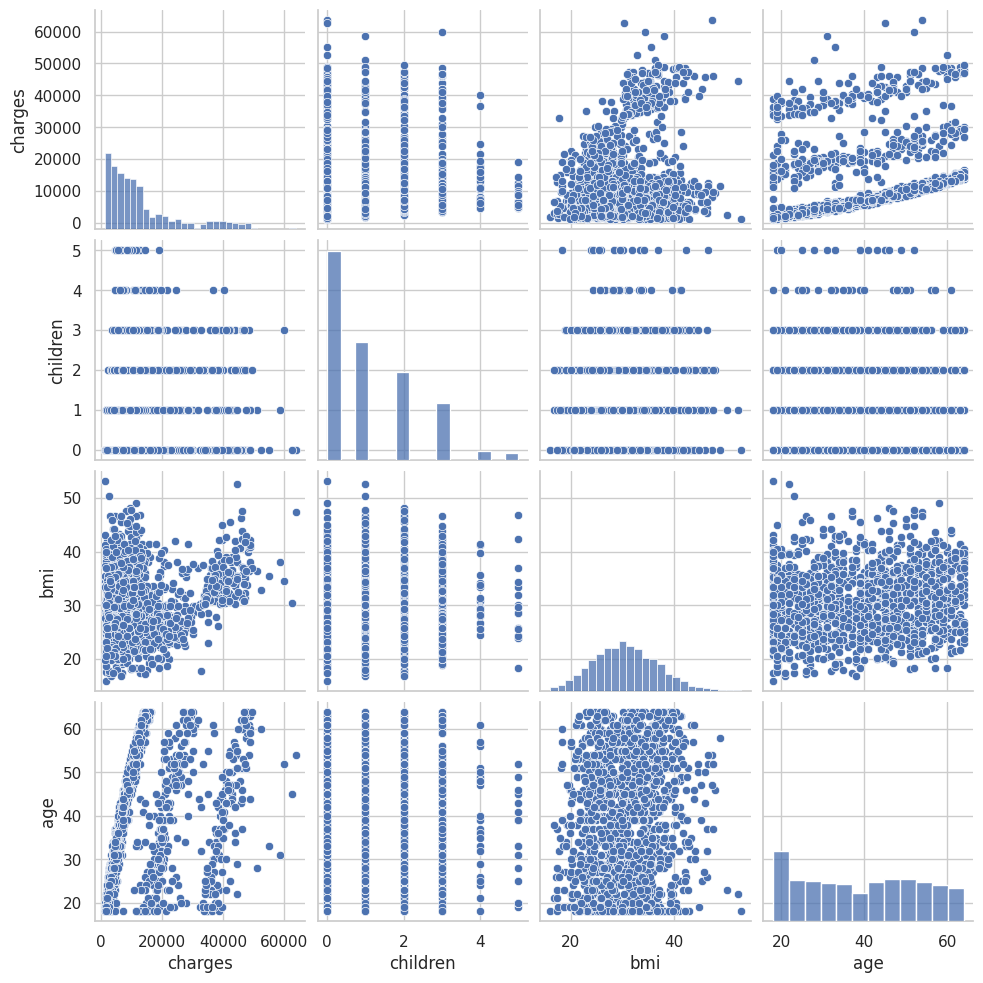

In [13]:
cols = ['charges','children','bmi','age']
sns.pairplot(df[cols],height=2.5)
plt.show()

<Axes: xlabel='age', ylabel='charges'>

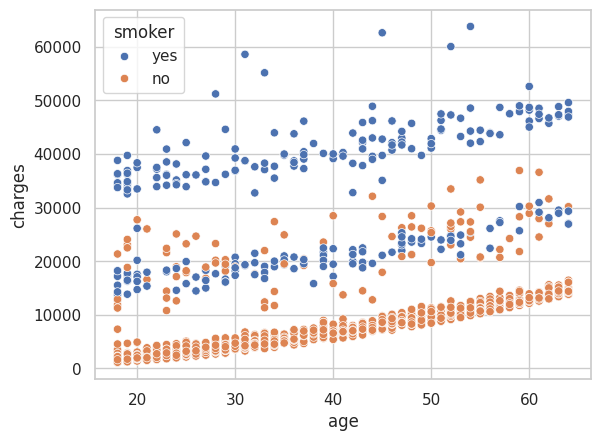

In [14]:
sns.scatterplot(data=df,x=df.age,y=df.charges,hue=df.smoker)

# PASO 4 CREAMOS MODELO DE REGRESION LINEAL MULTIPLE

In [ ]:
from sklearn.model_selection import train_test_split

data = df[cols].copy()
data

In [20]:
X = data.drop(columns=['charges'])
y = data[['charges']]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [29]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred.shape

(335, 1)

# METRICAS DEL MODELO

In [30]:
import sklearn.metrics as metrics

#erro cuadratico medio
mse = metrics.mean_squared_error(y_test,y_pred)
#R2 Coeficiente de determinación
r2 = metrics.r2_score(y_test,y_pred)

print(f'El error cuadratico medio(MSE) es de {round(mse,4)}')
print(f'El coeficiente de determinación(R2) es de {round(r2,4)}')

El error cuadratico medio(MSE) es de 0.9248
El coeficiente de determinación(R2) es de 0.0752


# REVISAMOS SI HAY VALORES ATIPICOS(outliers) QUE ESTAN PERJUDICANDO AL ENTRENAMIENTO

In [32]:
cols = ['charges','children','bmi','age']

outliers = {}

for col in cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

outliers_counts = {col: len(outliers[col]) for col in cols}
outliers_counts

{'charges': 139, 'children': 0, 'bmi': 9, 'age': 0}

# GRAFICAMOS LOS VALORES ATIPICOS

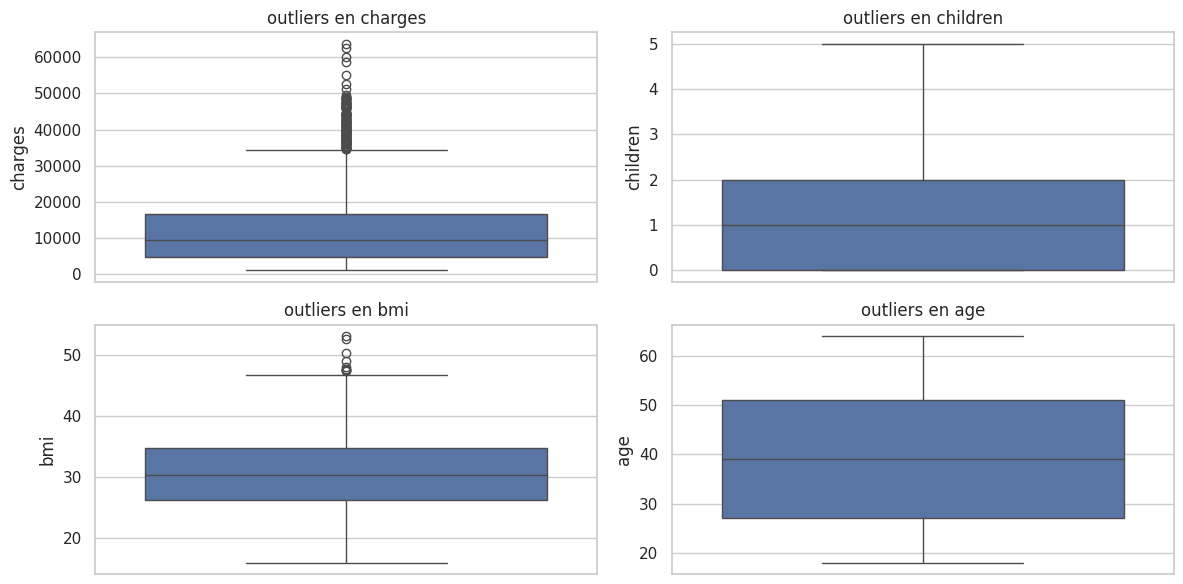

In [33]:
plt.figure(figsize=(12,6))
for i,col in enumerate(cols,1):
  plt.subplot(2,2,i)
  sns.boxplot(y=df[col])
  plt.title(f'outliers en {col}')

plt.tight_layout()
plt.show()

In [34]:
df.shape

(1338, 7)

# ELIMINAMOS OUTLIERS

In [35]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [36]:
df_cleaned = remove_outliers(df,'bmi')
df_cleaned = remove_outliers(df_cleaned,'charges')

df_cleaned.shape

(1191, 7)

#VOLVEMOS A ENTRENAR NUESTRO MODELO

In [37]:
cols = ['charges','age']
data = df_cleaned[cols].copy()
X = data.drop(columns=['charges'])
y = data[['charges']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred.shape

#erro cuadratico medio
mse = metrics.mean_squared_error(y_test,y_pred)
#R2 Coeficiente de determinación
r2 = metrics.r2_score(y_test,y_pred)

print(f'El error cuadratico medio(MSE) es de {round(mse,4)}')
print(f'El coeficiente de determinación(R2) es de {round(r2,4)}')

El error cuadratico medio(MSE) es de 0.7944
El coeficiente de determinación(R2) es de 0.2056
